# english.csv

In this assignment we will work with several real psycholinguistics datasets. These datasets are inspired by discussion in this [book](https://osf.io/pnumg/) by McGill Linguistics Professor Morgan Sondregger. 

The first part of the problem set will examine some lexical decision data. You can read about lexical decision experiments in the wikipedia article [here](https://en.wikipedia.org/wiki/Lexical_decision_task). (The first dataset also contains so-called *speeded naming* data. You can read about that in the speeded naming section of the first paper.)

The collection of the lexical decision data is originally described in. 

Balota, D. A., Cortese, M. J., Sergent-Marshall, S. D., Spieler, D. H., and Yap, M. J. (2004). [Visual word recognition of single-syllable words](https://drive.google.com/file/d/1TkFrg1jg0AK-9ZnKU5YXNVubdVUeNXbL/view?usp=sharing/). Journal of Experimental Psychology: General, 133(2):283–316.

In the following paper, this data was reanalyzed using some new features (predictors).

R. H. Baayen, L. Feldman, and R. Schreuder. [Morphological Influences on the Recognition of Monosyllabic Monomorphemic Words](https://drive.google.com/file/d/1USv3o6PXzocFtSggbcFn2fxYYrJ-pBcI/view?usp=sharing). Journal of Memory and Language, 53:496– 512, 2006. You can find a copy of this paper.

This data is discussed in Harald Baayen's book on linguistic data analysis.

Baayen, R. H. (2008). [Analyzing Linguistic Data: A practical introduction to statistics](https://drive.google.com/file/d/1RnQLXbzMARsEm8s8PFTYiSlaMc-vZ8Xa/view?usp=sharing). Cambridge University Press.

This particular file  was derived from the original data available as as the `english` dataframe of the [languageR package](https://cran.r-project.org/web/packages/languageR/index.html/).

Copy the data to your drive folder from: https://drive.google.com/file/d/19ybVdUWwZh_hSw69DRG7rYJd8o5dKWFK/view?usp=sharing.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/english.csv"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/english.csv'


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import  scipy

import warnings
warnings.filterwarnings('ignore')

## Problem 1

Use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to read the CSV file into a dataframe and then have a look at the data set.

In [3]:
# Problem 1: Put your answer here
filename = '/content/drive/My Drive/english.csv'
df = pd.read_csv(filename)

print(f'df.shape: {df.shape}')
print(f'df.columns: {df.columns}')

df.shape: (4566, 36)
df.columns: Index(['RTlexdec', 'RTnaming', 'Familiarity', 'Word', 'AgeSubject',
       'WordCategory', 'WrittenFrequency', 'WrittenSpokenFrequencyRatio',
       'FamilySize', 'DerivationalEntropy', 'InflectionalEntropy',
       'NumberSimplexSynsets', 'NumberComplexSynsets', 'LengthInLetters',
       'Ncount', 'MeanBigramFrequency', 'FrequencyInitialDiphone', 'ConspelV',
       'ConspelN', 'ConphonV', 'ConphonN', 'ConfriendsV', 'ConfriendsN',
       'ConffV', 'ConffN', 'ConfbV', 'ConfbN', 'NounFrequency',
       'VerbFrequency', 'CV', 'Obstruent', 'Frication', 'Voice',
       'FrequencyInitialDiphoneWord', 'FrequencyInitialDiphoneSyllable',
       'CorrectLexdec'],
      dtype='object')


In [4]:
df

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,DerivationalEntropy,InflectionalEntropy,NumberSimplexSynsets,NumberComplexSynsets,LengthInLetters,Ncount,MeanBigramFrequency,FrequencyInitialDiphone,ConspelV,ConspelN,ConphonV,ConphonN,ConfriendsV,ConfriendsN,ConffV,ConffN,ConfbV,ConfbN,NounFrequency,VerbFrequency,CV,Obstruent,Frication,Voice,FrequencyInitialDiphoneWord,FrequencyInitialDiphoneSyllable,CorrectLexdec
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294,0.14144,0.02114,0.693147,0.000000,3,8,7.036333,12.02268,10,3.737670,41,8.837826,8,3.295837,0.693147,2.708050,3.496508,8.833900,49,0,C,obst,burst,voiced,10.129308,10.409763,27
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438,0.06197,1.44339,2.484907,1.945910,6,0,9.883931,13.30069,10,6.693324,13,7.040536,10,6.693324,0.000000,0.000000,1.386294,5.817111,565,473,C,obst,frication,voiceless,12.422026,13.127395,30
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910,0.43035,0.00000,1.098612,2.639057,4,8,8.309180,12.07807,5,6.677083,6,3.828641,4,3.526361,0.693147,6.634633,1.098612,2.564949,150,0,C,obst,burst,voiceless,10.048151,11.003649,30
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225,0.35920,1.75393,2.484907,2.484907,4,3,7.943717,11.92678,17,4.762174,17,4.762174,17,4.762174,0.000000,0.000000,0.000000,0.000000,170,120,C,obst,burst,voiceless,11.796336,12.163092,26
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294,0.06268,1.74730,1.609438,1.386294,4,9,8.349620,12.19724,19,6.234411,21,6.249975,19,6.234411,0.000000,0.000000,1.098612,2.197225,125,280,C,obst,burst,voiceless,11.991567,12.436772,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,6.753998,6.446513,2.40,jag,old,V,2.079442,-1.686399,1.386294,0.30954,1.85123,1.098612,0.000000,3,18,6.229554,8.49433,20,4.744932,20,4.744932,19,4.736198,0.000000,0.000000,0.000000,0.000000,10,7,C,obst,frication,voiced,8.311644,8.390041,29
4562,6.711022,6.506979,3.17,hash,old,V,3.663562,0.436718,1.609438,0.15110,0.77890,1.386294,1.791759,4,11,8.825582,13.49254,25,5.141664,23,4.890349,21,4.882802,1.609438,3.688879,1.098612,0.693147,38,7,C,obst,frication,voiceless,12.567203,12.665546,29
4563,6.592332,6.386879,3.87,dash,old,V,5.043425,0.504395,1.945910,0.63316,1.65739,2.564949,1.609438,4,10,8.356139,11.32815,25,5.141664,23,4.890349,21,4.882802,1.609438,3.688879,1.098612,0.693147,113,231,C,obst,burst,voiced,8.920923,9.287764,29
4564,6.565561,6.519884,4.97,flirt,old,V,3.135494,0.062801,1.945910,0.99953,1.75885,1.609438,0.693147,5,1,8.751224,10.59918,7,4.624973,14,5.164786,7,4.624973,0.000000,0.000000,2.079442,4.304065,10,66,C,obst,frication,voiceless,10.425639,10.932142,29


## Question 1-4

Your first job is to familiarize yourself with the dataset by briefly examining the two papers above. First, read the wikipedia article on lexical decision, and briefly (2-4 sentences) explain the lexical decision experimental task.

**Q1: The lexical decision experimental task requires subjects to indicate, typically with a button-press, whether a visual (or auditory) stimulus is a word or a non-word.  The reaction times and error rates of subjects to different words and pseudowords is then analyzed, often for studies in semantic memory or word recognition.**

Start with the earlier paper then move on to the later paper. Note these two papers are long and use a lot of technical jargon from the field of psycholinguistics. *Reading each paper carefully would take several hours and you probably would not be able to understand everything unless you have previous familiarity with experimental psychology.*  This is not the goal of this part of the assignment. Instead, the goal is to just familiarize yourself as efficiently as possible with what some of the columns in the data set mean. An important skill in data science is quickly evaluating the high level idea and questions studied in a paper and finding the places where quantitites are defined, without doing a careful reading.

A good way to approach this is to first read the abstract, the introduction and the conclusion and then have a look at the figures, always keeping in mind the data from the CSV above and trying to find interpretations for the various columns. Don't get stuck on stuff you don't understand unless you are pretty sure you need to understand it to answer the question.

Focus on figuring out where you can find the relevant information to answer the following questions. 

***Question 2:*** In these studies and in this dataset various regression models are used to analyze the experimental data. What was measured in these studies that corresponds to $\mathbf{y}$ in our notation from class (i.e., the quantities to be predicted) and which columns in the dataset have these values? 

**Q2: The relevant variables to be predicted are lexical decision times which are in variable RTlexdec and speeded naming times which are in variable RTnaming.**

***Question 3:*** In both papers a number of different quantities are used as predictors for the experimental measures. These correspond to the columns of our $\mathbf{X}$ matrix from class. Note that between these two papers there are a lot of variables, and thus a lot of columns in the table. Please determine the meaning of the first seven features from these papers (`Familiarity` to `FamilySize`).

<b>Q3: The first seven features from these papers are: 'Familiarity', 'Word', 'AgeSubject', 'WordCategory', 'WrittenFrequency', 'WrittenSpokenFrequencyRatio', and 'FamilySize'. 

The 'Familiarity' column contains the subjective familiarity rating of words.

The 'Word' column contains the words and nonwords used in the experiment.

The 'AgeSubject' column specifies the age group of the subject (either 'young' or 'old').

The 'WordCategory' column specifies the word category of the word (either 'N' for noun or 'V' for verb).

The 'WrittenFrequency' column contains the log frequency of the word in the CELEX lexical database.

The 'WrittenSpokenFrequencyRatio' column contains the log ratio of written frequency (CELEX) to spoken frequency (British National Corpus).

The 'FamilySize' column contains the log of the morphological family size. The morphological family size is the number of complex word types in which a word occurs as a constituent.</b>

***Question 4:*** For each of these predictors, how would you intuitively expect it to relate to the reactions times in the $\mathbf{y}$ variables? (Note that there is no right or wrong answer here, so long as you give a justification for your reasoning). Please be brief, no more than 2-4 sentences per predictor.

<b>Q4:

I would expect familiarity to be directly proportional to lexical decision times and speed naming times.  If a word is more familiar, it would be easier to determine whether it is a word or nonword quickly.

I would expect different lexical decision times and speed naming times for different words.  Depending on what string is used, it will take more or less time to determine whether it is a word or nonword.

I would expect young subjects to have lower lexical decision times and speed naming times than old subjects.  If a subject is younger, their reaction times would likely be quicker considering that younger people generally have quicker reflexes than older people.

I would expect nouns to have lower lexical decision times and speed naming times than verbs.  Verbs can have multiple different tenses which could make them more difficult to identify than nouns as a real word.

I would expect words with higher written frequency values to have lower lexical decision times and speed naming times.  If a word has a higher written frequency, it is likely encountered by people more in everyday language and thus more familiar to them, making it easier to recognize.

I would expect high written-to-spoken frequency ratios to have low lexical decision times and speed naming times.  If a word has a high written-to-spoken frequency ratio, then it has a higher written frequency than spoken frequency and since the task requires identifying whether a string shown visually is a word or non-word, it would likely be easier to identify words with high written frequency.

I would expect high family size values to correspond with high lexical decision times and speed naming times.  If a word has a high family size then it occurs as a consituent more often, which would likely facilitate word recognition.</b>


## Problem 2-5

Let's simplify the dataset a bit, to have fewer columns. 

In [5]:
# Problem 2: Write some code that drops all of the columns from the English dataset past the 9th column (the last column should be FamilySize)
df_9col = df[['RTlexdec', 'RTnaming', 'Familiarity', 'Word', 'AgeSubject', 'WordCategory', 'WrittenFrequency', 'WrittenSpokenFrequencyRatio', 'FamilySize']]
df_9col

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294
...,...,...,...,...,...,...,...,...,...
4561,6.753998,6.446513,2.40,jag,old,V,2.079442,-1.686399,1.386294
4562,6.711022,6.506979,3.17,hash,old,V,3.663562,0.436718,1.609438
4563,6.592332,6.386879,3.87,dash,old,V,5.043425,0.504395,1.945910
4564,6.565561,6.519884,4.97,flirt,old,V,3.135494,0.062801,1.945910


Now use the [Seaborn library](https://seaborn.pydata.org/) to produce a set of plots between (see `pairplot`) all the variables in the dataset.

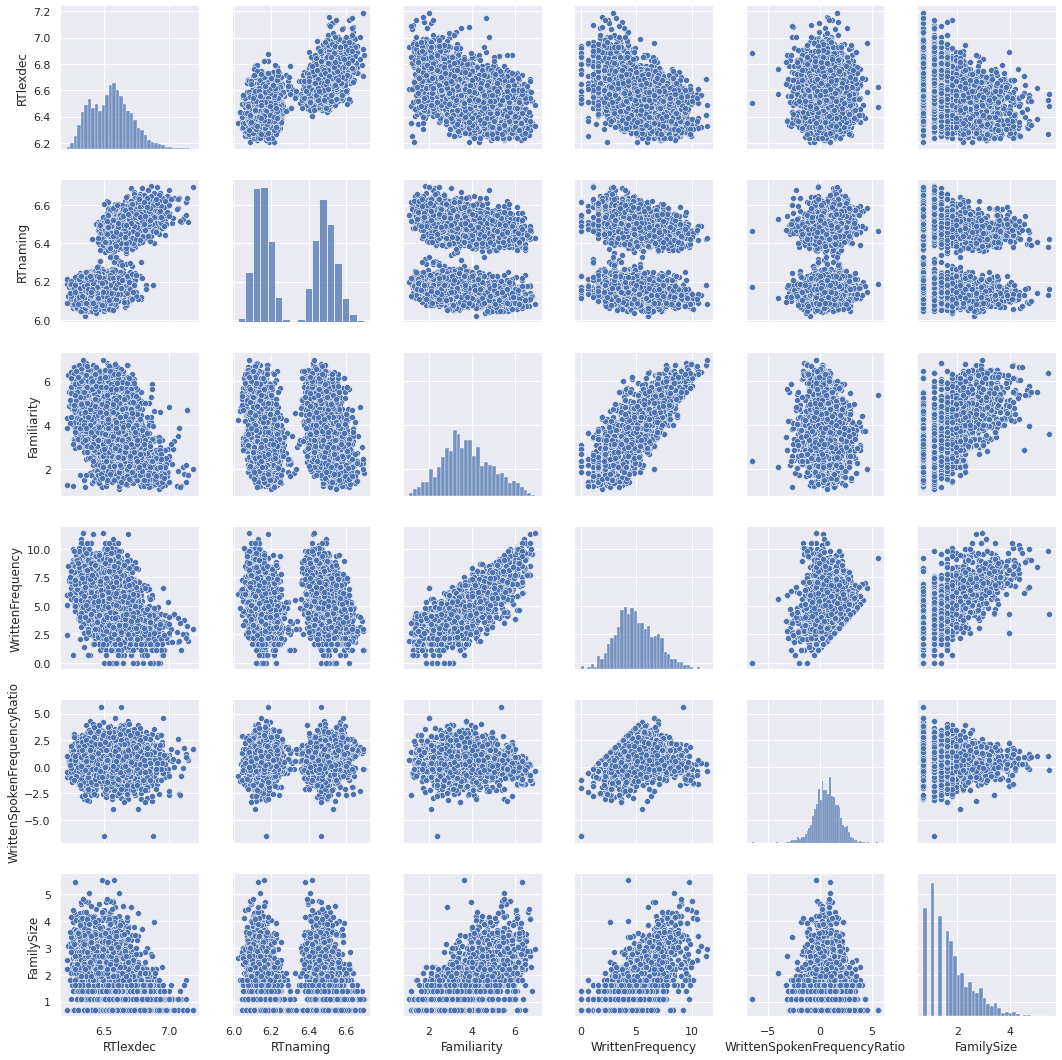

In [6]:
sns.set()
sns.pairplot(df_9col)

Let's focus on the subset of the data from young participants.

In [7]:
# Problem 3: Write an expression that selects the subset of rows which correspond to the young speakers
df_young = df_9col.loc[df_9col['AgeSubject'] == 'young']
df_young

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294
...,...,...,...,...,...,...,...,...,...
3729,6.514031,6.144615,2.40,jag,young,V,2.079442,-1.686399,1.386294
3730,6.491376,6.145901,3.17,hash,young,V,3.663562,0.436718,1.609438
3731,6.360318,6.089498,3.87,dash,young,V,5.043425,0.504395,1.945910
3732,6.319923,6.226537,4.97,flirt,young,V,3.135494,0.062801,1.945910


Let's examine the relationship between the written frequency of a word on it's 
lexical decision time. Use  [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to make a plot with a linear trend line that 
has the frequency on the $x$-axis and lexical decision time on the $y$-axis.

You may also find this page useful in understanding how to use Seaborne to plot regression lines: https://seaborn.pydata.org/tutorial/regression.html


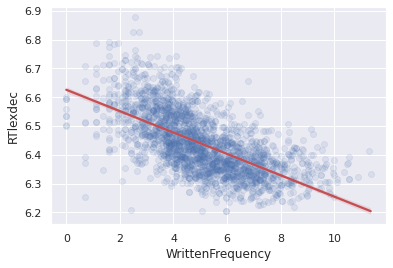

In [8]:
# Problem 4: Use seaborne.regplot to plot the data with a best fit regressions line
sns.regplot(x='WrittenFrequency', y='RTlexdec', data=df_young, scatter_kws={'color': 'b', 'alpha': 0.1}, line_kws={'color': 'r'})

In order to examine whether or the relationship between two variables is really linear, it is useful to look at a *locally-smoothed regression line* that relates the $x$ and $y$ axes of a plot. This is a kind of regression model where the function is refit localy for many subsets of the data then a smooth line is interpolated between these points. One standard technique for this is known as *locally weighted scatterplot smoothing* or [LOWESS](https://en.wikipedia.org/wiki/Local_regression) and is implemented as an option for the line drawn by the `regplot` function. Using this examine whether the relationship between frequency and lexical decision times really looks linear.

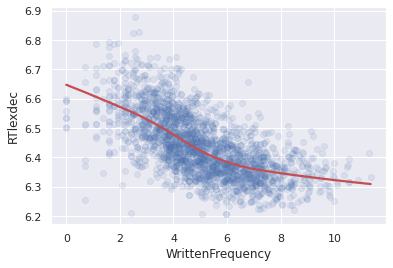

In [9]:
# Problem 5: Use seaborne.regplot to make a plot with the best fit LOWESS line
sns.regplot(x='WrittenFrequency', y='RTlexdec', data=df_young, lowess=True, scatter_kws={'color': 'b', 'alpha': 0.1}, line_kws={'color': 'r'})

## Question 5

***Question 5***: What do you see in this data when you look at the two plots above? Do you think that a linear model represents the relationship between written frequency and reaction times? It may be useful  to turn on an off the plotting of the underlying data points with the `scatter=False` argument to the functions.

**Q5: When you look at the two plots above, you see that words with higher written frequency have lower lexical decision reaction times.  The linear model does not represent the relationship between written frequency and reaction time well.  From the plot with the best fit LOWESS line, we see that the relationship is not perfectly linear. There seems to be a tapering of the line as written frequency approaches the value 12. Thus, we should try using other models to graph the relationship between frequency and lexical decision time.**

## Problem 6-9

Let's try looking at some more complex models of the relationship between frequency and lexical decision time. Here is some starter code similar to those that we looked at in class for writing a polynomial regression. Complete the code as indicated.


In [10]:
# Problem 6: Set up variable X (for features) and y from the input data
X = df_young['WrittenFrequency'].to_numpy()
y = df_young['RTlexdec'].to_numpy()

# Problem 7: Split this into test and train subsets, with 10% of the data in test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_plot = np.linspace(0, 10, 5000).reshape(-1, 1)

def regression_model(model_class='Linear Regression', degrees=[1,2,3,4,5,6,7,20,25], alpha=1, silent=False):
    plt.figure(dpi=100)
    plt.xlabel('Written Frequency')
    plt.ylabel('Lexcical Decision Reaction Time')
    plt.ylim(6.15, 6.95)
    plt.scatter(X_train, y_train, color='tab:pink', alpha=0.1)

    print(f'Model class: {model_class}')

    count = 0
    # colors = ['tab:red','tab:orange','gold','yellowgreen','forestgreen','lightskyblue','tab:blue','blueviolet','tab:brown']
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:olive','tab:cyan']

    for degree in degrees:
        # Problem 8: Fit a polynomial regression model of each degree above
        if model_class == 'Linear Regression':
            r = LinearRegression()
        elif model_class == 'Ridge Regression':
            r = Ridge(alpha=alpha)
        elif model_class == 'Lasso Regression':
            r = Lasso(alpha=alpha)
        else:
            plt.show()
            return
        
        model = make_pipeline(PolynomialFeatures(degree), r)
        model.fit(X_train, y_train)
    
        if not silent:
            print("\tDegree " + str(degree) + "\n\t\tTrain R^2: " + str(model.score(X_train,y_train)))
            print("\t\tTest R^2: " + str(model.score(X_test,y_test)))
        # print("\t\t" + str(r.coef_))

        # Problem 9: Use plt.plot to add a line to the plot for this model using the X_plot points
        plt.plot(X_plot, model.predict(X_plot), color=colors[count], label='degree={0}'.format(degree))
        count += 1


    if model_class == 'Ridge Regression':
        print(f'alpha={alpha}')
    
    elif model_class == 'Lasso Regression':
        print(f'alpha={alpha}')

    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

Model class: Linear Regression
	Degree 1
		Train R^2: 0.40283651869320086
		Test R^2: 0.49274826222654616
	Degree 2
		Train R^2: 0.4194054339182173
		Test R^2: 0.5236067249464638
	Degree 3
		Train R^2: 0.43763882210466976
		Test R^2: 0.5312961926869213
	Degree 4
		Train R^2: 0.4456409397321034
		Test R^2: 0.5452445605183156
	Degree 5
		Train R^2: 0.44564496449391655
		Test R^2: 0.5451127261910471
	Degree 6
		Train R^2: 0.44713483884376476
		Test R^2: 0.5437579239758795
	Degree 7
		Train R^2: 0.44733656049232173
		Test R^2: 0.5433980771404407
	Degree 20
		Train R^2: 0.44185269522511833
		Test R^2: 0.5202355843962467
	Degree 25
		Train R^2: 0.33247765021094056
		Test R^2: 0.17541118580101733


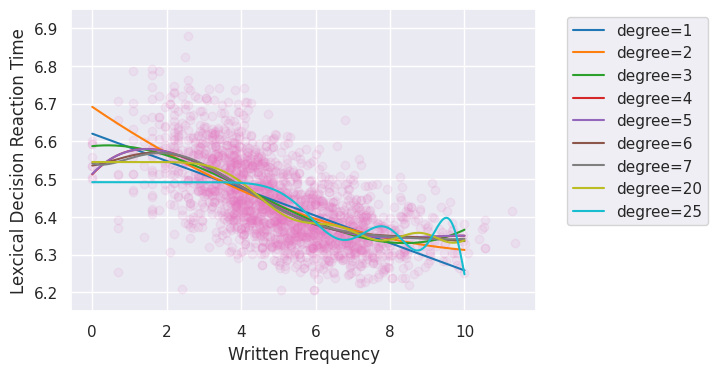

In [11]:
regression_model(model_class='Linear Regression')

## Question 6

***Question 6:*** Which degree polynomial provided the best fit to this dataset? What does this say about the relationship between frequency and lexical decision times?

**Q6: The degree 4 polynomial provided the best fit to this dataset with a Test R^2 value of 0.5452.  This suggests that the relationship between frequency (x) and lexical decision times (y) is best modelled as a 4th degree polynomial in x.  From the graph, we can also see that as written frequency increases, lexical decision times tend to decrease.**

## Problem 10

Model class: Lasso Regression
	Degree 1
		Train R^2: 0.0
		Test R^2: -0.01184512328458398
	Degree 2
		Train R^2: 0.12227604233216094
		Test R^2: 0.11800887094366863
	Degree 3
		Train R^2: 0.26750779586723805
		Test R^2: 0.3077420716932542
	Degree 4
		Train R^2: 0.3033773364565234
		Test R^2: 0.3449329830919752
	Degree 5
		Train R^2: 0.36954934578377246
		Test R^2: 0.4241207393942718
	Degree 6
		Train R^2: 0.3654005788949643
		Test R^2: 0.4188554738068708
	Degree 7
		Train R^2: 0.4008132284326484
		Test R^2: 0.4611155626460997
	Degree 20
		Train R^2: 0.4197555821165715
		Test R^2: 0.4903132473029183
	Degree 25
		Train R^2: 0.4181115549019648
		Test R^2: 0.4876214683994298
alpha=1


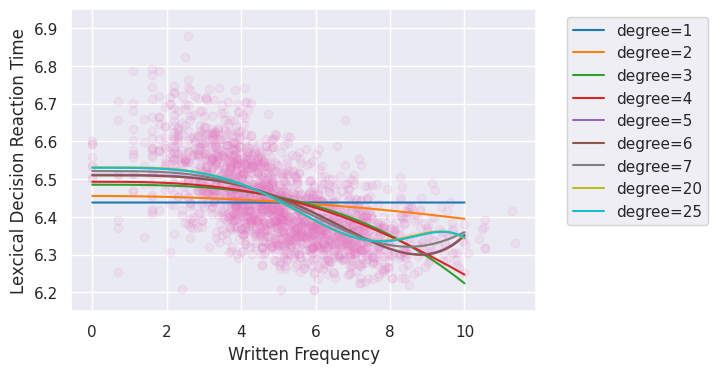

Model class: Lasso Regression
alpha=100


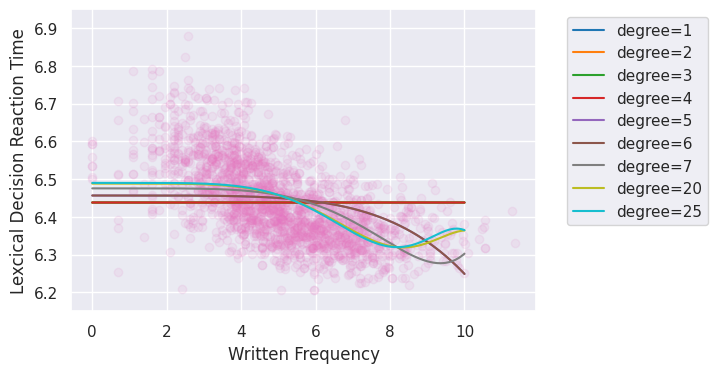

Model class: Lasso Regression
alpha=1000


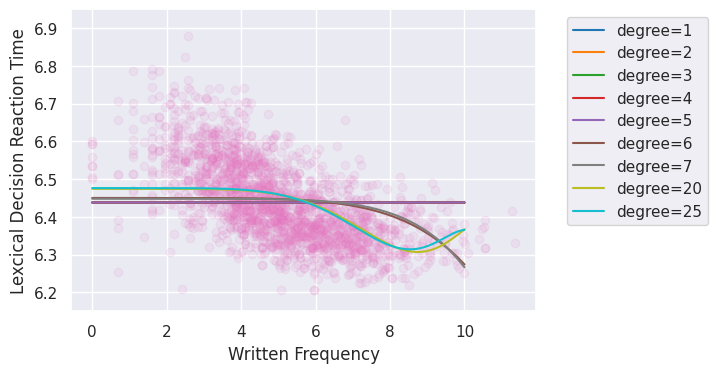

In [12]:
# Problem 10: Repeat the above analyses using Lasso and Ridge regression
regression_model(model_class='Lasso Regression', alpha=1)
regression_model(model_class='Lasso Regression', alpha=100, silent=True)
regression_model(model_class='Lasso Regression', alpha=1000, silent=True)

Model class: Ridge Regression
	Degree 1
		Train R^2: 0.40283651050697267
		Test R^2: 0.4927238167983012
	Degree 2
		Train R^2: 0.4194049173238433
		Test R^2: 0.5234600047038419
	Degree 3
		Train R^2: 0.4376386942177945
		Test R^2: 0.5313278008497049
	Degree 4
		Train R^2: 0.44560551815951255
		Test R^2: 0.5448501786702602
	Degree 5
		Train R^2: 0.44556719609558354
		Test R^2: 0.5442854431256665
	Degree 6
		Train R^2: 0.4471332418050206
		Test R^2: 0.5438352394885444
	Degree 7
		Train R^2: 0.44724829390674575
		Test R^2: 0.5439983416417302
	Degree 20
		Train R^2: -4.231876622032981
		Test R^2: -3.7892869484231375
	Degree 25
		Train R^2: 0.3885164728394337
		Test R^2: 0.35271379134278436
alpha=1


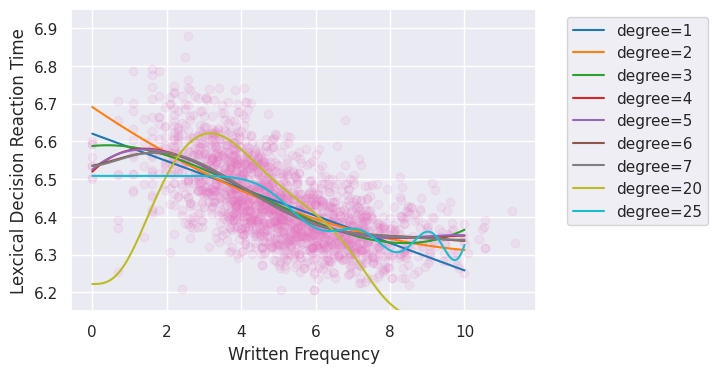

Model class: Ridge Regression
alpha=100


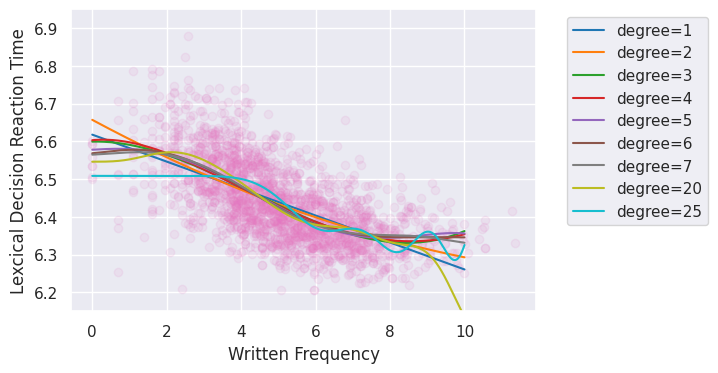

Model class: Ridge Regression
alpha=1000


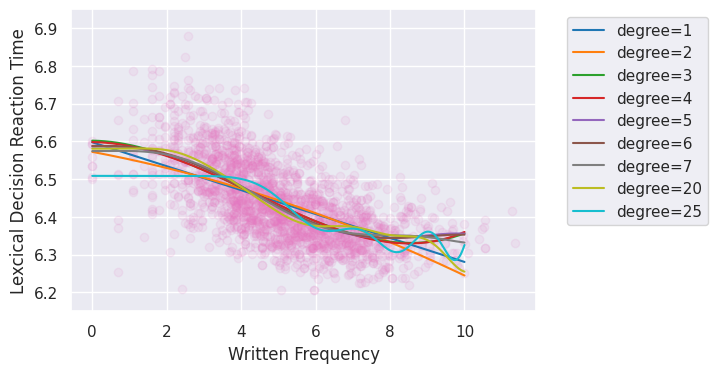

In [13]:
regression_model(model_class='Ridge Regression', alpha=1)
regression_model(model_class='Ridge Regression', alpha=100, silent=True)
regression_model(model_class='Ridge Regression', alpha=1000, silent=True)

## Question 7

***Question 7:*** What did you find using these regularization techniques? How were they similar or different to each other and the results above? Why?

**Q7: Both ridge regression and lasso regression prevent overfitting by penalizing models where coefficients get too large.  From the graphs, you can see that (if alpha is set high enough) both ridge regression and lasso regression tend to have smoother lines (less sensitive to noise in the data) compared to the linear regression model.  The main difference between the two regularization methods is that ridge regression shrinks coefficients while lasso regression is more likely to set parameters to 0, meaning certain features will be ignored.  In the lasso regression graph, you can see that the beginning and end of each line, where data is quite noisy, does not fit the data very well and seems to simply ignore the points there.  The ridge regression graphs do a better job of fitting the given dataset.  The results are relatively similar to the linear regression plots, the only major difference being that the lines are smoother and that there is less difference between the different degrees.**

Using ridge regression, the degree 4 polynomial provided the best fit to the dataset with a test R^2 value 0.5449. Using lasso regression, the degree 20 polynomial provided the best fit to the dataset with a test R^2 value of 0.4903, while the degree 4 polynomial had a lower test R^2 value of 0.3449. Ridge regression obtained a similar result to linear regression, which had a test R^2 value of 0.5452 for a degree 4 polynomial.

# regularity.csv

Now we will look at aniother dataset available [here](https://drive.google.com/file/d/1eaQSqiJFyrsDprmsKzZ0ysxBUmyBzVGX/view?usp=sharing).

This dataset is about morphological *regularity*&mdash;the property of whether words marke certain information like tense using regular endings (e.g., *walk*/*walked*) or irregular processes (e.g., *sing*/*sang*). The dataset consists of a Dutch verbs and is described in the following paper.


Tabak, W. M., Schreuder, R., and Baayen, R. H. (2005). [Lexical statistics and lexical processing: Semantic density, information complexity, sex, and irregularity in Dutch.](https://drive.google.com/file/d/1WRqjc7MwbCiSgOXESszBfxclnxQgAhu5/view?usp=sharing) In Kesper, S. and Reis, M., editors, Linguistic Evidence — Empirical, Theoretical, and Computational Perspectives, pages 529–555. Mouton de Gruyter, Berlin, Germany.



## Problem 11

In [3]:
# Problem 11: Read in the regularity dataset and familiarize yourself with it
filename = '/content/drive/My Drive/regularity.csv'
df = pd.read_csv(filename)

print(f'df.shape: {df.shape}')
print(f'df.columns: {df.columns}')

df.shape: (700, 14)
df.columns: Index(['Unnamed: 0', 'Verb', 'WrittenFrequency', 'FamilySize',
       'LengthInLetters', 'VerbalSynsets', 'MeanBigramFrequency', 'NcountStem',
       'Regularity', 'InflectionalEntropy', 'Auxiliary', 'Valency', 'NVratio',
       'WrittenSpokenRatio'],
      dtype='object')


In [4]:
df

,Unnamed: 0,Verb,WrittenFrequency,FamilySize,LengthInLetters,VerbalSynsets,MeanBigramFrequency,NcountStem,Regularity,InflectionalEntropy,Auxiliary,Valency,NVratio,WrittenSpokenRatio
0,1,stelen,1.609438,2.564949,5,1,14.47,9,regular,1.00000,hebben,3,4.366913,-2.302585
1,2,tollen,5.411646,2.397895,3,1,13.61,26,regular,2.48640,zijnheb,3,-0.078927,-2.351375
2,3,blijken,9.883183,1.791759,5,1,13.84,6,irregular,2.00458,zijn,4,-3.192341,-1.526056
3,4,gloeien,6.908755,2.079442,5,3,12.95,4,regular,2.56009,hebben,5,-6.908755,1.791759
4,5,kakken,3.784190,2.079442,3,1,13.48,24,regular,1.99257,hebben,2,-0.526093,-1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,volgen,9.986035,4.043051,4,7,13.44,4,regular,2.61010,zijnheb,5,-9.986035,0.543615
696,697,ploffen,5.533389,2.302585,4,4,12.82,5,regular,2.38985,zijnheb,4,-1.011601,-0.154151
697,698,stelen,7.391415,2.564949,5,1,14.47,9,irregular,1.77808,hebben,3,-1.415064,-0.105361
698,699,jagen,7.682022,4.007333,4,5,13.32,11,regular,2.57416,hebben,7,-7.682022,1.734601


## Question 8

Figure 1 in the paper displays the correlations between various factors (features) and predictability. 

***Question 8***: Briefly describe what each of the 5 factors  excluding  inflectional entropy, log argument structures, and log N-count means and what relationship it shows to regularity.

<b>Q8: 

Log lemma frequency is the log of the summed frequencies of all inflectional variants from CELEX.

Log family size is the log of the number of complex words in which the verb stem occurs as a constituent.

Auxiliary refers to the auxiliary selected by the verb for the present perfect tense (either 'hebben', 'zijn', or 'zijnheb').

Noun-verb frequency ratio is the ratio of noun frequency to verb frequency based on use.  The paper found that regulas tend to have a higher noun frequency.

Spoken-written frequency ratio is the ratio of the verb's frequency in spoken and written Dutch and was included to investigate potential effects of register and age of acquisition.  The paper found that regulars tend to have a higher spoken frequency.</b>

## Problem 12-15

In this section, we will focus on the relationship between `FamilySize` and `Regularity`. Unlike in the last dataset, regularity is not a continuous value, but rather a binary variable. Thus we will need to use a classification model to examine it.

For this pupose, we will use logistic regression.

training accuracy: 0.7714285714285715
testing accuracy: 0.6857142857142857



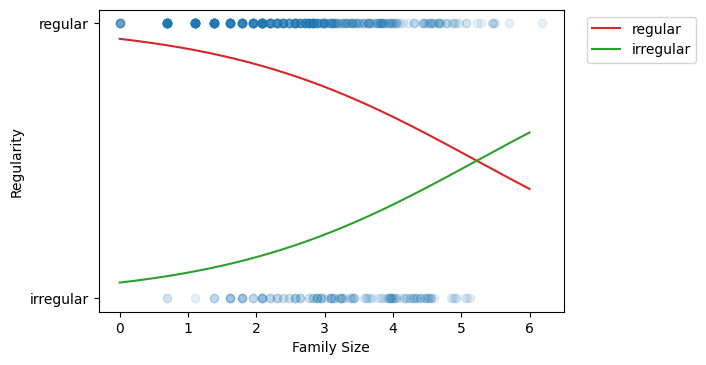

In [5]:
# Problem 12: Set up X as FamilySize, y as Regularity in preparation to use them to fit a logistic regression model
X = df['FamilySize'].to_numpy()
y = df['Regularity'].to_numpy()

# Problem 13: Split X, and y into train and test with 10% test split, and create an X_plot variable for plotting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

X_train_plot = X_train
y_train_plot = [1 if y_value == 'regular' else 0 for y_value in y_train]

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_plot = np.linspace(0, 6, 5000).reshape(-1, 1)

# Problem 14: Fit a logistic regression model on this data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, lr_model.predict(X_train))
test_acc = accuracy_score(y_test, lr_model.predict(X_test))

print(f'training accuracy: {train_acc}')
print(f'testing accuracy: {test_acc}')
print()

# Problem 15: Using plt.plot make a scatter plot of the data along with the predicted probability of regularity as a function of family size
# The "predict_proba" function will be useful
plt.figure(dpi=100)
plt.xlabel('Family Size')
plt.ylabel('Regularity')
plt.yticks(ticks=[0, 1], labels=['irregular', 'regular'])

plt.scatter(X_train_plot, y_train_plot, color='tab:blue', alpha=0.1)

plt.plot(X_plot, lr_model.predict_proba(X_plot)[:,1], color='tab:red', label='regular')
plt.plot(X_plot, lr_model.predict_proba(X_plot)[:,0], color='tab:green', label='irregular')

plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [6]:
# scatter plot of the data
# df_reg = df.loc[df['Regularity'] == 'regular']
# df_irreg = df.loc[df['Regularity'] == 'irregular']

# X_reg = df_reg['FamilySize'].to_numpy()
# y_reg = df_reg['Regularity'].to_numpy()
# X_irreg = df_irreg['FamilySize'].to_numpy()
# y_irreg = df_irreg['Regularity'].to_numpy()

# plt.scatter(X_reg, y_reg, color='tab:red', alpha=0.1)
# plt.scatter(X_irreg, y_irreg, color='tab:blue', alpha=0.1)

## Question 9-10

***Question 9***: What do you see in the fit to the logistic regression? How does the probability of being regular vary with morphological family size?

**Q9: The logistic regression graph shows that as family size increases, the predicted probability of regularity decreases (red line).**

***Question 10***: What does the relationship on Figure 1 of the paper look like? Does this match your analysis above?

**Q10: Figure 1 of the paper shows that the probability of being regular decreases from log family size value of 0 to log family size value of 2.5, and then increases from log family size value of 2.5 to log family size value of around 5.  This does not match the analysis above, which shows that as family size increases, the probability of being regular strictly decreases.**



## Problem 16-19

In class, we saw an example of a regression problem in which the curve was best fit by a polynomial. We can, of course, use polynomial relationships in a classification model as well. Let's take a similar approach to the analysis that we just did, except first transforming our input features polynomially.

Model class: Logistic Regression
	Degree 1
		Train R^2: 0.7714285714285715
		Test R^2: 0.6857142857142857
	Degree 2
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857
	Degree 3
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857
	Degree 4
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857
	Degree 5
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857



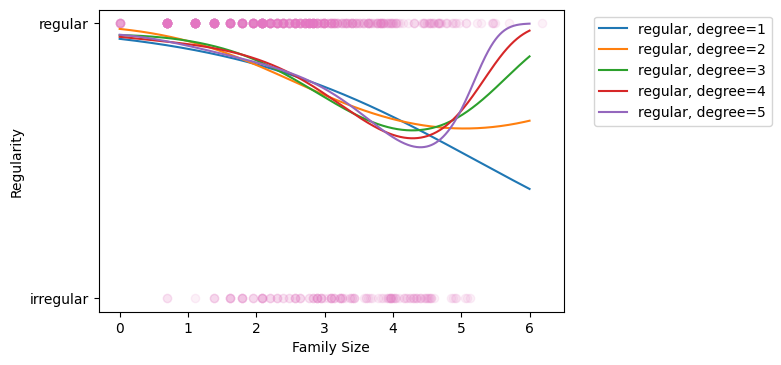

In [7]:
# Problem 16: Set up X, y, test and train as above
X = df['FamilySize'].to_numpy()
y = df['Regularity'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

X_train_plot = X_train
y_train_plot = [1 if y_value == 'regular' else 0 for y_value in y_train]

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_plot = np.linspace(0, 6, 5000).reshape(-1, 1)

# Problem 17: Plot the data points using plt.scatter
plt.figure(dpi=100)
plt.xlabel('Family Size')
plt.ylabel('Regularity')
plt.yticks(ticks=[0, 1], labels=['irregular', 'regular'])
plt.scatter(X_train_plot, y_train_plot, color='tab:pink', alpha=0.1)

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
count = 0

print("Model class: " + "Logistic Regression")
# [1,2,3,4,5]
for degree in [1,2,3,4,5]:
    # Problem 18: Set up a logistic regression model with polynomial features of degree and train it
    r = LogisticRegression()
    lr_model = make_pipeline(PolynomialFeatures(degree), r)
    lr_model.fit(X_train, y_train)

    print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(accuracy_score(y_train, lr_model.predict(X_train))))
    print("\t\tTest R^2: "+ str(accuracy_score(y_test, lr_model.predict(X_test))))

    # Problem 19: Plot the resulting predicted probability line on the plot
    plt.plot(X_plot, lr_model.predict_proba(X_plot)[:,1], color=colors[count], label='regular, degree={0}'.format(degree))
    # plt.plot(X_plot, lr_model.predict_proba(X_plot)[:,0], color=colors[count])
    count += 1

print()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Question 11-12

***Question 11***: What do you see in the fit of these polynomial features? What is the relationship in plain English between the family size variable and the probability of being regular?

**Q11: put your answer here. no more than 2-4 sentences.**

For degree > 1, we tend to see a U-shaped curve for the relationship between family size and the predicted probabiliity of regularity.  This matches Figure 1 of the paper, which also found that low and very large family sizes had a higher probability of being regular, while medium sized families had a lower probability of being regular.  These results show that the probability of being regular is higher for small and large family sizes, and lower for intermediate family sizes.

***Question 12***: Speculate as to why this relationship might hold theoretically?

**Q12: put your answer here. no more than 2-4 sentences.**

One potential reason why the probability of being regular is higher for small and large family sizes, and lower for intermediate family sizes is that regular verbs tend to have more small and large, and less intermediate family sizes in general.  This makes sense because regular verbs follow a typical pattern, so the family size would likely be similarly large or small for these words, while irregular verb conjugations might not be in the same family (and thus the family size for irregular verbs would be intermediate or somewhat smaller).